In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# F distribution  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html#scipy.stats.f  

## F ratio test  


In [189]:
#help(stats.f) 
#f.cdf,  Cumulative distribution function <- x : array_like quantiles
# probability density function at x, input: x
#f.ppf, percent point function, input:q, lower tail probability and dfn' and 'dfd' to degrees of freedom numerator and denominator
#survival function

confidence_interval = 0.95
n1 = 75
df1 = n1-1
mean1 = 26.056
var1 = 0.1345
std1 = var1**0.5

n2 = 63
df2 = n2-1
mean2 = 22.546
var2 = 0.5649
std2 = var2**0.5

dfn = max(df1,df2)
dfd = min(df1,df2)

#Lower tail probability is the H0, null hyphotesis probability
F_critic = stats.f.ppf(confidence_interval,dfn=dfn,dfd=dfd)
print("With a confidence_interval of {}% the F statistic critic value is {} ".format(confidence_interval*100,F_critic)) 
F = max(var1,var2)/min(var1,var2)
print("F statistic that we got from our variances {}".format(F))

p_value = stats.f.pdf(F,dfn=dfn,dfd=dfd) #alpha level, error-I rate
print("The p value associated with our F statistic calculated is {}".format(p_value))

F_reconstructed = stats.f.ppf(1-p_value,dfn=dfn,dfd=dfd)
print("Reconstructing the F statistic from the p_value: {}".format(F_reconstructed))


With a confidence_interval of 95.0% the F statistic critic value is 1.5030638249644699 
F statistic that we got from our variances 4.199999999999999
The p value associated with our F statistic calculated is 7.414515486610961e-08
Reconstructing the F statistic from the p_value: 3.879950064746693


## Creating a function to test two samples

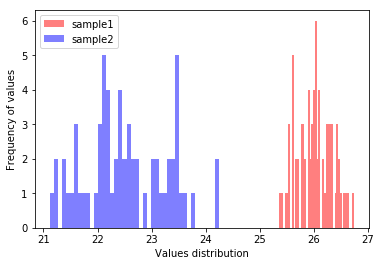

With a confidence_interval of 95.0% the F statistic critic value is 1.5030638249644699 
F statistic that we got from our variances 4.199999999999999
The p value associated with our F statistic calculated is 7.414515486610961e-08
Reconstructing the F statistic from the p_value: 3.879950064746693


In [190]:
def f_ratio(s1,s2):
    v1,v2 = np.var(s1),np.var(s2)
    n1,n2 = s1.size,s2.size
    df1,df2 = n1-1,n2-1
    dfn = max(df1,df2)
    dfd = min(df1,df2)
    #Lower tail probability is the H0, null hyphotesis probability
    F_critic = stats.f.ppf(confidence_interval,dfn=dfn,dfd=dfd)
    print("With a confidence_interval of {}% the F statistic critic value is {} ".format(confidence_interval*100,F_critic)) 
    F = max(var1,var2)/min(var1,var2)
    print("F statistic that we got from our variances {}".format(F))
    p_value = stats.f.pdf(F,dfn=dfn,dfd=dfd) #alpha level, error-I rate
    print("The p value associated with our F statistic calculated is {}".format(p_value))
    F_reconstructed = stats.f.ppf(1-p_value,dfn=dfn,dfd=dfd)
    print("Reconstructing the F statistic from the p_value: {}".format(F_reconstructed))



#Creats a normal distribution with mean=mean1, std=std1,size= n1
sample1 = np.random.normal(loc=mean1,scale=std1,size=(n1))
sample2 = np.random.normal(loc=mean2,scale=std2,size=(n2))
bins = int(round(min(n1,n2)/1.5))
plt.hist(sample1,bins=bins,color="red",alpha=0.5,label="sample1")
plt.hist(sample2,bins=bins,color="blue",alpha=0.5,label="sample2")
plt.legend()
plt.xlabel('Values distribution')
plt.ylabel('Frequency of values')
plt.show()

f_ratio(sample1,sample2)
